# Comprehensive Data Exploration for Titanic Dataset

Plan:
- read in data with pandas
    - save labels as numpy array (y, 1D)
- fill in missing data
    - first, check if any values are missing
    - necessary BEFORE plotting or using feature selection
- plot features and correlations between features
    - sklearn functionality for correlation/feature selection?
- choose features based on correlation strength
    - set as numpy arrays
- scale features
    - normalize or stretch/compress range if necessary
- combine features into single numpy array (X, 2D)
- break into train/validation sets
    - 80/20 split?
- create different classifiers (starting with default settings?), train, and evaluate on validation set
    - logistic regression
    - KNN
    - naive Bayes
    - SVM with kernel
    - decision tree
    - random forest
    - MLP
- choose classifier with best performance on validation set
    - or consider other decent classifiers and tune hyperparameters accordingly
- adjust best classifier as necessary
    - tune hyperparameters
- make predictions and test set and submit to Kaggle
###  

Notes:
- include basic imports in topmost cell, specific imports in relevant cells, and run import statements before adding additional code to cells
- will need to do same preprocessing on test set...
    - just wait until the end and include all preprocessing functionality

## Import Packages and Load Data

In [1]:
# basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot')

In [2]:
# load data
data = pd.read_csv('train.csv')

# save labels
y = data.Survived.values

# save number of data points
m = y.size

In [3]:
# see some data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Can disregard:
- passenger ID
- passenger names
- cabin: lots of missing data
- ticket: categorical and very sparse
###  

Left with:
- class
- sex
- age
- siblings and spouses
- parents and children
- fare
- embarked

## Visualize Features

In [4]:
# look at stats for relevant features
data.describe().astype(int)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891,891,891,714,891,891,891
mean,446,0,2,29,0,0,32
std,257,0,0,14,1,0,49
min,1,0,1,0,0,0,0
25%,223,0,2,20,0,0,7
50%,446,0,3,28,0,0,14
75%,668,1,3,38,1,0,31
max,891,1,3,80,8,6,512


This shows that age is the only relevant numeric feature with missing values (714 data points in age vs 891 data points overall)

In [5]:
# setup possibly relevant featues as np arrays
pclass = data.Pclass.values
sex = data.Sex.values
age = data.Age.values
sibsp = data.SibSp.values
parch = data.Parch.values
fare = data.Fare.values
embarked = data.Embarked.values

In [6]:
# make sex numeric
sex = np.asarray([1 if i == 'male' else 0 for i in sex])

In [7]:
# make embarked numeric
embarked = np.asarray([1 if i == 'S' else 2 if i == 'Q' else 3 for i in embarked])

In [8]:
# fill in missing age values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean')
age = imputer.fit_transform(age.reshape(-1, 1)).ravel()

### Class

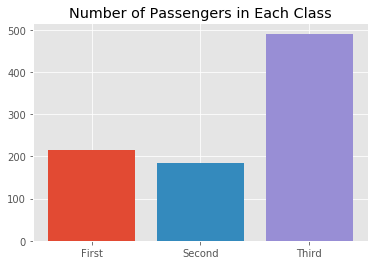

In [9]:
# visualize number in each class
for i in range(1, 3 + 1):
    plt.bar(i, np.sum(pclass == i))
    
plt.xticks([1, 2, 3], ['First', 'Second', 'Third'])
plt.title('Number of Passengers in Each Class')
plt.show()

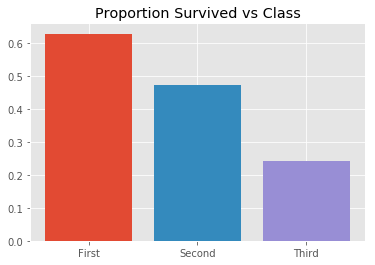

In [10]:
# visualize % survived vs class
for i in range(1, 3 + 1):
    plt.bar(i, np.sum(y[pclass == i]) / np.sum(pclass == i))

plt.xticks([1, 2, 3], ['First', 'Second', 'Third'])
plt.title('Proportion Survived vs Class')
plt.show()

### Sex

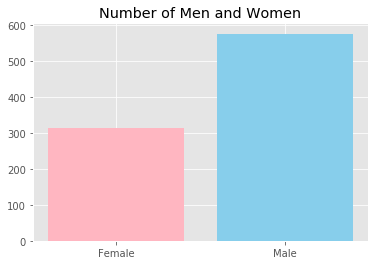

In [11]:
# visualize number of men and women
plt.bar(0, np.sum(sex == 0), color='lightpink')
plt.bar(1, np.sum(sex == 1), color='skyblue')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Number of Men and Women')
plt.show()

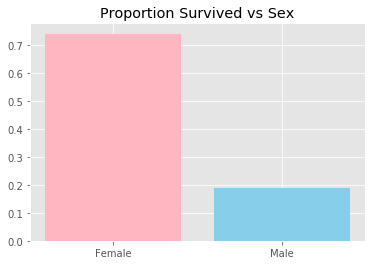

In [12]:
# visualize % survived vs sex
plt.bar(0, np.sum(y[sex == 0]) / np.sum(sex == 0), color='lightpink')
plt.bar(1, np.sum(y[sex == 1]) / np.sum(sex == 1), color='skyblue')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Proportion Survived vs Sex')
plt.show()

### Age

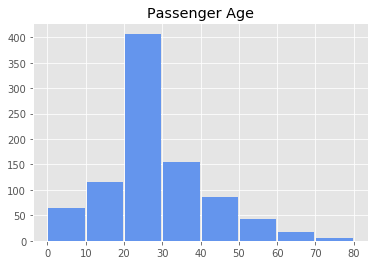

In [13]:
# visualize number in each age group
for i in range(5, 80, 10):
    plt.bar(i, np.sum(np.logical_and((i - 5) < age, age <= (i + 5))),
           width=9.5, color='cornflowerblue')

plt.title('Passenger Age')
plt.show()

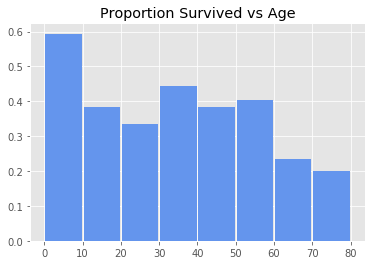

In [14]:
# visualize % survived vs age
for i in range(5, 80, 10):
    plt.bar(i, np.sum(y[np.logical_and((i - 5) < age, age <= (i + 5))]) 
        / np.sum(np.logical_and((i - 5) < age, age <= (i + 5))),
           width=9.5, color='cornflowerblue')

plt.title('Proportion Survived vs Age')
plt.show()

### Siblings and Spouses

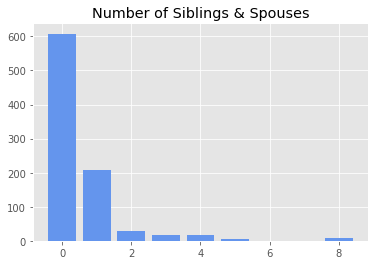

In [15]:
# visualize number of sibsp
for i in range(np.min(sibsp), np.max(sibsp) + 1):
    plt.bar(i, np.sum(sibsp == i), color='cornflowerblue')

plt.title('Number of Siblings & Spouses')
plt.show()

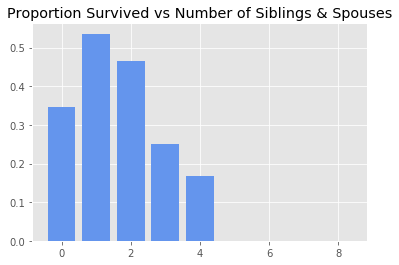

In [16]:
# visualize % survived vs sibsp
for i in range(np.min(sibsp), np.max(sibsp) + 1):
    if np.sum(sibsp == i) != 0:
        plt.bar(i, np.sum(y[sibsp == i]) / np.sum(sibsp == i), color='cornflowerblue')

plt.title('Proportion Survived vs Number of Siblings & Spouses')
plt.show()

### Parents and Children

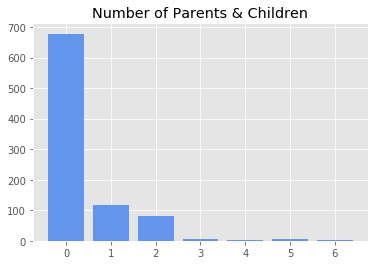

In [17]:
# visualize number of parents and children
for i in range(np.min(parch), np.max(parch) + 1):
    plt.bar(i, np.sum(parch == i), color='cornflowerblue')

plt.title('Number of Parents & Children')
plt.show()

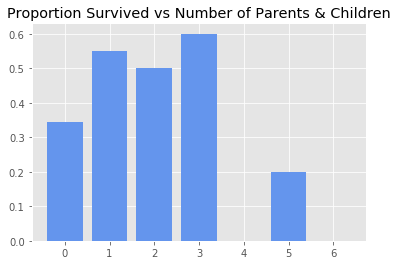

In [18]:
# visualize % survived vs parch
for i in range(np.min(parch), np.max(parch) + 1):
    if np.sum(parch == i) != 0:
        plt.bar(i, np.sum(y[parch == i]) / np.sum(parch == i), color='cornflowerblue')

plt.title('Proportion Survived vs Number of Parents & Children')
plt.show()

### Port of Embarkation

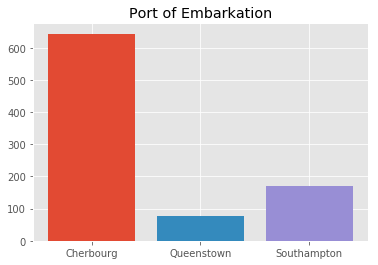

In [19]:
# visualize ports of embarkation
for i in range(1, 3 + 1):
        plt.bar(i, np.sum(embarked == i))

plt.xticks([1, 2, 3], ['Cherbourg', 'Queenstown', 'Southampton'])
plt.title('Port of Embarkation')
plt.show()

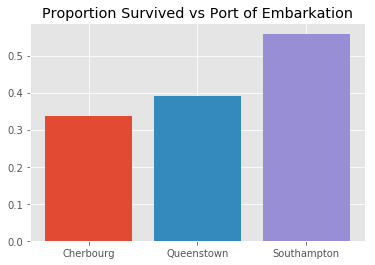

In [20]:
# visualize % survived vs embarked
for i in range(1, 3 + 1):
        plt.bar(i, np.sum(y[embarked == i]) / np.sum(embarked == i))

plt.xticks([1, 2, 3], ['Cherbourg', 'Queenstown', 'Southampton'])
plt.title('Proportion Survived vs Port of Embarkation')
plt.show()

### Fare

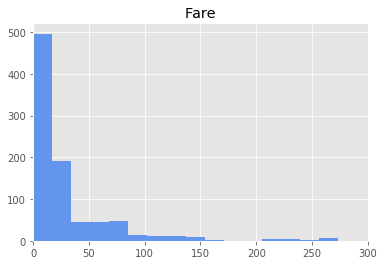

In [21]:
# visualize fare
plt.hist(fare, bins=30, color='cornflowerblue')
plt.xlim(0, 300)
plt.title('Fare')
plt.show()

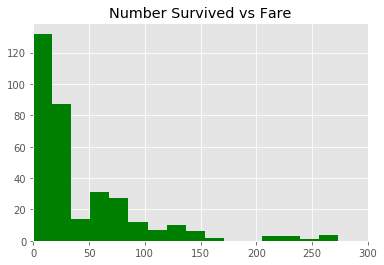

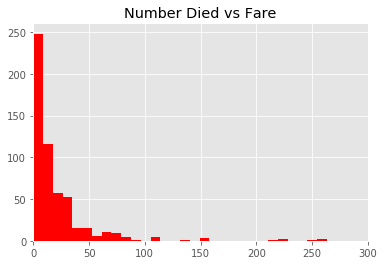

In [22]:
# visualize % survived vs fare
plt.hist(fare[y == 1], bins=30, color='green')
plt.xlim(0, 300)
plt.title('Number Survived vs Fare')
plt.show()

plt.hist(fare[y == 0], bins=30, color='red')
plt.xlim(0, 300)
plt.title('Number Died vs Fare')
plt.show()

## Choose Features

In [23]:
# features thus far
X_temp = np.array([pclass, sex, age, sibsp, parch, fare, embarked]).T
feature_names = np.array(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'])
print('Original Data:\n', feature_names)

# play around with sklearn feature selection
print('\nTransformed Data:')
from sklearn.feature_selection import SelectKBest
for i in range(1, 8):
    selector = SelectKBest(k=i)
    selector.fit_transform(X=X_temp, y=y)
    print('k = ', i, ': ', feature_names[selector.get_support()], '\n', sep='')

Original Data:
 ['pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked']

Transformed Data:
k = 1: ['sex']

k = 2: ['pclass' 'sex']

k = 3: ['pclass' 'sex' 'fare']

k = 4: ['pclass' 'sex' 'fare' 'embarked']

k = 5: ['pclass' 'sex' 'parch' 'fare' 'embarked']

k = 6: ['pclass' 'sex' 'age' 'parch' 'fare' 'embarked']

k = 7: ['pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked']



Features in order of importance, according to sklearn:
1. sex
2. class
3. fare
4. embarked
5. parch
6. age
7. sibsp

Features I will use:
- sex: looks like strong discrimator, top pick by sklearn
- class: same reasoning as sex
- fare: similar to class, but gives more information
- embarked: strong discrimator
- age: create synthetic features -- child, adult, old
    - cutoffs: under 10, 10 -> 60, over 60
###  

Notes for features I will exclude:
- parch: weakly correlated with survived, 0 for most passengers
- sibsp: same reasoning as parch

## Further Process Features

To do:
- sex: nothing
- class: one-hot encode
- fare: scale
- embarked: one-hot encode
- age: create synthetic

In [24]:
# create synthetic features for age: child, adult, old
child = np.asarray([1 if i <= 10 else 0 for i in age])
adult = np.asarray([1 if 10 < i <= 60 else 0 for i in age])
old = np.asarray([1 if 60 < i else 0 for i in age])

In [25]:
# one-hot encode class
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
pclass = onehotencoder.fit_transform(pclass.reshape(-1, 1)).toarray()

In [26]:
# one-hot encode embarked
embarked = onehotencoder.fit_transform(embarked.reshape(-1, 1)).toarray()

In [27]:
# scale fare
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
fare = scaler.fit_transform(fare.reshape(-1, 1))

In [28]:
# combine features
X = np.hstack((child.reshape(-1, 1),
               adult.reshape(-1, 1),
               old.reshape(-1, 1),
               pclass,
               embarked,
               fare.reshape(-1, 1)))

In [29]:
# confirm that encoding worked correctly
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [30]:
# compare to above
X[-5:]

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.02537431],
       [ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.0585561 ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  0.04577135],
       [ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.0585561 ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.01512699]])

## Create Models

In [31]:
# for evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def average_accuracy(clf, iterations=1000):
    """ Function to compute average classifier accuracy over many train/val splits of data """
    # sum accuracies over many iterations
    acc_total = 0
    
    for i in range(iterations):
        # perform split
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)
        
        # train classifier: must do each iteration
        clf.fit(X_train, y_train)
        
        # make predictions
        y_pred = clf.predict(X_val)
        
        # get prediction accuracy
        acc_total += accuracy_score(y_val, y_pred)
    
    # see average accuracy
    print(acc_total / iterations)
    return None

# THE FOLLOWING ACCURACIES APPEAR TOO LOW

### Logistic Regression

In [32]:
# create, then evaluate logistic regression
from sklearn.linear_model import LogisticRegression
average_accuracy(LogisticRegression())

0.704687150838


### K-Nearest Neighbors

In [33]:
# create, then evaluate KNN
from sklearn.neighbors import KNeighborsClassifier
average_accuracy(KNeighborsClassifier(n_neighbors=5))

0.695636871508


### Naive Bayes

In [34]:
# create, then evaluate naive bayes
from sklearn.naive_bayes import GaussianNB
average_accuracy(GaussianNB())

0.692296089385


### Support Vector Machine

In [35]:
# create, then evaluate svm
from sklearn.svm import SVC
average_accuracy(SVC(kernel='rbf'))

0.69348603352


### Decision Tree

In [36]:
# create, then evaluate decision tree
from sklearn.tree import DecisionTreeClassifier
average_accuracy(DecisionTreeClassifier(criterion='gini'))

0.690754189944


### Random Forest

In [38]:
# create, then evaluate random forest
from sklearn.ensemble import RandomForestClassifier
average_accuracy(RandomForestClassifier(n_estimators=500, criterion='gini'), iterations=25)

0.689832402235


### Neural Network

In [39]:
# create, then evaluate MLP
from sklearn.neural_network import MLPClassifier
average_accuracy(MLPClassifier(hidden_layer_sizes=(24, 12, 6), max_iter=1000), iterations=25)

0.714189944134
